# Probability, Information Theory & Statistics

*Probability & Information Theory*, introduces the mathematical fields that enable us to quantify uncertainty as well as to make predictions despite uncertainty. These fields are essential because machine learning algorithms are both trained by imperfect data and deployed into noisy, real-world scenarios they haven’t encountered before.

You’ll develop a working understanding of 

- Variables, probability distributions, metrics for assessing distributions.
- Essential statistical tests for assessing whether data are correlated with each other or sampled from different populations -- tests which frequently come in handy for critically evaluating the inputs and outputs of machine learning algorithms.

# Part 2: Distributions in Machine Learning

In [41]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

import seaborn as sns
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)
# Surpress Futurewarnings messages due to seaborn incompatibilities

### Uniform Distribution
The uniform distribution is about as straightforward as they come. It has constant probabilities across the entire range of values in its domain: 

In [42]:
# Generate 10,000 random values from a uniform distribution
# Default range is [0, 1) - all values equally likely
# Think of this as spinning a perfectly balanced continuous wheel from 0 to 1

u = np.random.uniform(size=10000)

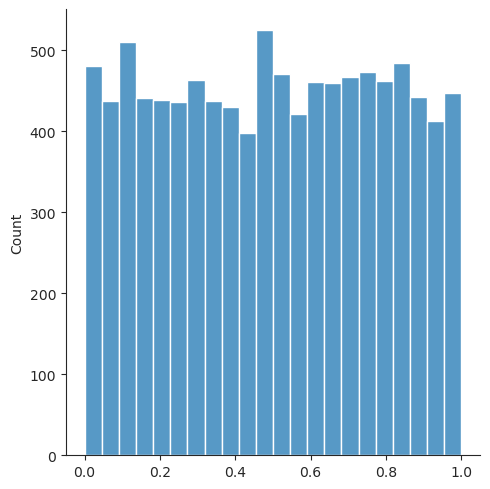

In [43]:
# Set seaborn style for cleaner plot appearance

sns.set_style('ticks')

# Create distribution plot (histogram) to visualize the uniform distribution
# Should show roughly equal heights across all bins - that's what "uniform" means

_ = sns.displot(u)

Real-world examples include: 

* Dice rolling (PMF)
* Card drawing (PMF)
* Model hyperparameters
* Emission of radioactive particles
* Economic demand 
* Analog-to-digital signal quantization errors

## Gaussian
Carl Friedrich Gauss (early 19th c. German mathematician and scientist) is the namesake of over a hundred concepts across mathematics, physics, and astronomy. One of those concepts is the Gaussian distribution, also known as the "bell curve" (though several distributions are bell-shaped) or **normal distribution**: 

In [44]:
# Generate 10,000 random values from a standard normal distribution
# Default: mean (μ) = 0, standard deviation (σ) = 1
# This is the famous "bell curve" - most values cluster around the mean

x = np.random.normal(size=10000)

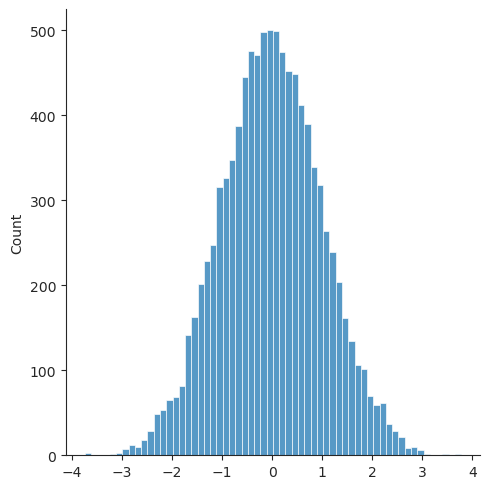

In [45]:
_ = sns.displot(x)

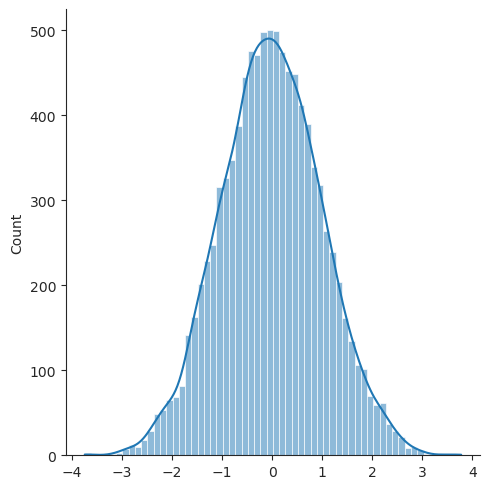

In [46]:
# Plot histogram with KDE (Kernel Density Estimation) overlay
# kde=True adds a smooth curve showing the probability density
# The curve helps visualize the theoretical distribution beneath the histogram

_ = sns.displot(x, kde=True)

When the normal distribution has a mean ($\mu$) of zero and standard deviation ($\sigma$) of one, as it does by default with the NumPy `normal()` method...

In [47]:
# Verify that our sample has mean ≈ 0 and standard deviation ≈ 1
# Due to random sampling, values won't be exactly 0 and 1, but very close
np.mean(x)   # Should be close to 0

-0.016570080512078738

In [48]:
np.std(x)    # Should be close to 1

1.0048180176227748

## Normal Distribution

...it is a **standard normal distribution** (a.k.a., standard Gaussian distribution). Normal distributions can be denoted with the *math calligraphy* font as $\mathcal{N}(\mu, \sigma^2)$, thus the standard normal distribution can be denoted as $\mathcal{N}(0, 1)$. 

(N.B.: $\sigma^2 = \sigma$ in this case because $1^2 = 1$.)

Normal distributions are by far the most common distribution in statistics and machine learning. They are typically the default option, particularly if you have limited information about the random process you're modeling, because: 

1. Normal distributions assume the greatest possible uncertainty about the random variable they represent (relative to any other distribution of equivalent variance). Details of this are beyond the scope of this tutorial. 
2. Simple and very complex random processes alike are, under all common conditions, normally distributed when we sample values from the process. Since we sample data for statistical and machine learning models alike, this so-called **central limit theorem** (covered next) is a critically important concept. 

In [49]:
n_experiments = 10000
heads_count = [np.random.binomial(100, 0.5) for i in range (n_experiments)]
heads, event_count = np.unique(heads_count, return_counts=True)
event_proba = event_count/n_experiments

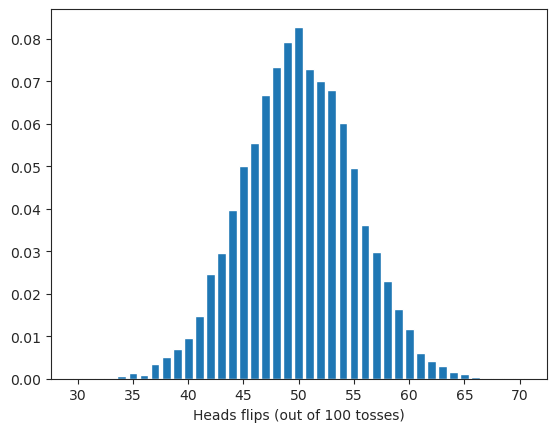

In [50]:
plt.bar(heads, event_proba)
_ = plt.xlabel('Heads flips (out of 100 tosses)')

Real-world examples include: 

* Probability of heads across *n* tosses (PMF; $n = 5$ earlier, $n = 100$ below)
* Sum of di(c)e rolls (PMF)
* Height of adult women
* Height of adult men
* Education test scores, e.g., SAT

## The Central Limit Theorem
To develop a functional understanding of the CLT, let's sample some values from our normal distribution:

In [51]:
# Take a random sample of 10 values from our distribution
# replace=False means we sample without replacement (no duplicate picks)
# This simulates collecting a small sample from a population

x_sample = np.random.choice(x, size=10, replace=False)
x_sample

array([ 1.74319286,  1.36564963,  1.76540372,  0.38400782, -0.4136112 ,
       -1.03676055, -1.15562834,  0.279722  ,  0.00744371,  0.09817638])

The mean of a sample isn't always going to be close to zero with such a small sample:

In [52]:
# Calculate the mean of our small sample
# With only 10 values, the sample mean might not be very close to 0
# This demonstrates sampling variability

np.mean(x_sample)

0.30375960505371397

Let's define a function for generating **sampling distributions** of the mean of a given input distribution:

In [53]:
def sample_mean_calculator(input_dist, sample_size, n_samples):
    """
    Calculate means from repeated samples to demonstrate the Central Limit Theorem.
    
    This function simulates the real-world process of:
    1. Taking a sample from a population
    2. Computing its mean
    3. Repeating this many times to see the distribution of sample means
    
    Parameters:
    - input_dist: the population to sample from
    - sample_size: how many values in each sample
    - n_samples: how many times to repeat the sampling process
    """
    sample_means = []  # Store the mean from each sample
    
    for i in range(n_samples):
        # Take one sample of size sample_size
        sample = np.random.choice(input_dist, size=sample_size, replace=False)
        # Calculate and store its mean
        sample_means.append(sample.mean())
    
    return sample_means  # Returns list of all sample means


Note: The `replace` parameter in `np.random.choice()`
* `replace=False`: sample without replacement (like drawing cards - can't draw same card twice)
* `replace=True`: sample with replacement (like rolling dice - can get same number again)

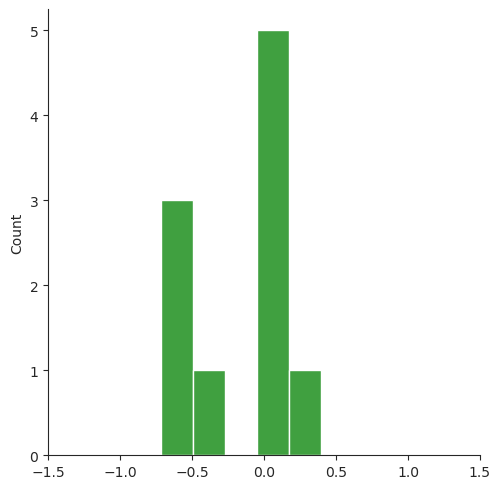

In [54]:
sns.displot(sample_mean_calculator(x, 10, 10), color='green')
_ = plt.xlim(-1.5, 1.5)

The more samples we take, the more likely that the sampling distribution of the means will be normally distributed: 

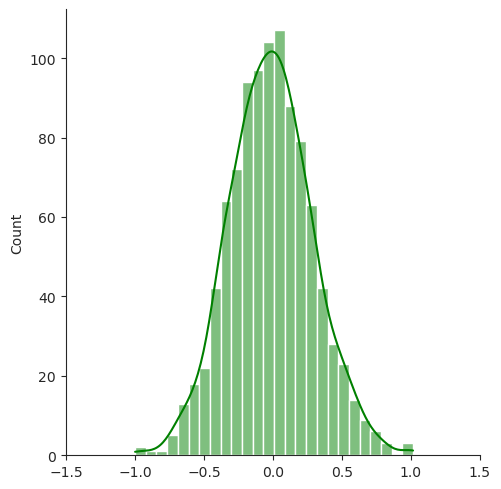

In [55]:
# Take 10 samples of size 10, calculate their means, and plot
# With only 10 samples, the distribution looks irregular and "bumpy"
# This shows why we need many samples to see the CLT in action

sns.displot(sample_mean_calculator(x, 10, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

The larger the sample, the tighter the sample means will tend to be around the population mean:

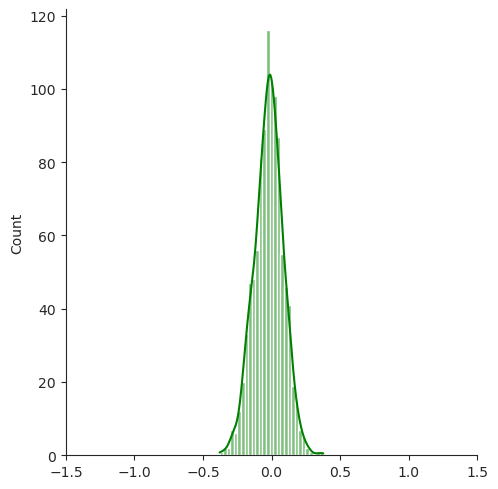

In [56]:
# Take 1000 samples, but now each sample has 100 values (instead of 10)
# Notice the distribution is NARROWER - larger samples give more precise estimates
# The mean is still around 0, but there's less variability
# This shows: larger samples → more consistent sample means

sns.displot(sample_mean_calculator(x, 100, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

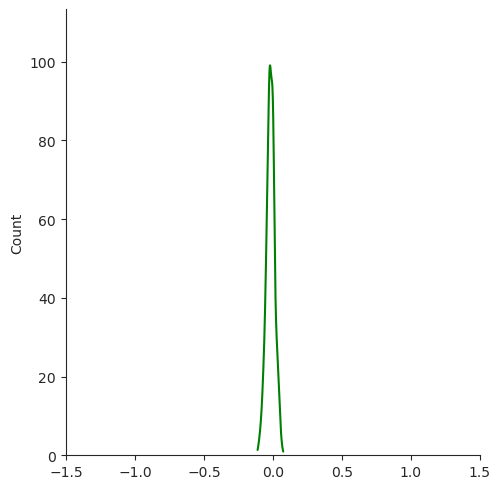

In [57]:
# Take 1000 samples, each with 1000 values
# Distribution is even NARROWER - sample means cluster tightly around 0
# With very large samples, we get very accurate estimates of the population mean
# This is why larger datasets are more reliable in machine learning

sns.displot(sample_mean_calculator(x, 1000, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

#### Sampling from a skewed distribution

In [58]:
# Generate a highly skewed (non-normal) distribution
# skewness = 10 creates a distribution with a long right tail
# This is NOT bell-shaped, yet CLT still applies to its sample means

s = st.skewnorm.rvs(10, size=10000)

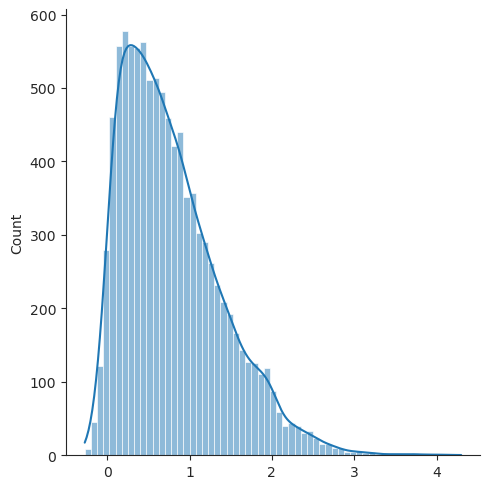

In [59]:
# Visualize the skewed distribution
# Notice it's NOT symmetric - it has a long tail to the right
# This represents data like income (few very high earners pulling the distribution right)
_ = sns.displot(s, kde=True)

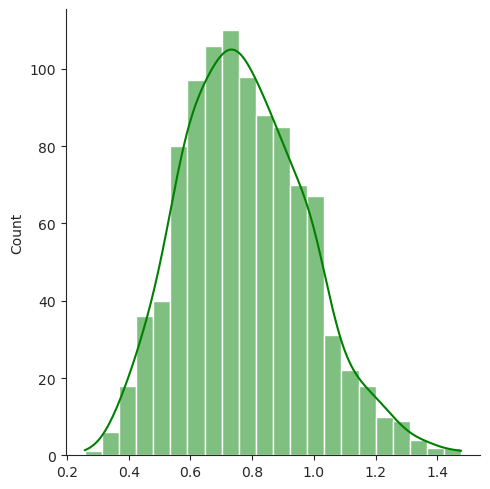

In [60]:
# Take 1000 samples of size 10 from the SKEWED distribution
# Plot the distribution of sample means
# Even from a skewed source, sample means start to look normal!
# CLT is working, but with small samples (n=10) we still see some skewness

_ = sns.displot(sample_mean_calculator(s, 10, 1000), color='green', kde=True)

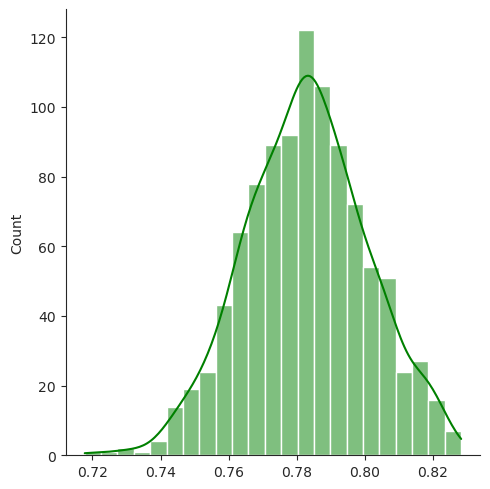

In [61]:
# Take 1000 samples of size 1000 from the skewed distribution
# With large samples, the distribution of means is beautifully normal (bell-shaped)!
# This is the power of CLT: no matter the original distribution's shape,
# sample means become normally distributed with large enough samples

_ = sns.displot(sample_mean_calculator(s, 1000, 1000), color='green', kde=True)

#### Sampling from a multimodal distribution

In [62]:
# Create a bimodal distribution (two peaks) by combining two normal distributions
# First 5000 values: normal distribution centered at 0
# Second 5000 values: normal distribution centered at 4
# concatenate() joins them into one array
# Bimodal distributions might represent data like "morning commuters" and "evening commuters"

m = np.concatenate((np.random.normal(size=5000), np.random.normal(loc = 4.0, size=5000)))

*Note*
* `np.concatenate()` joins multiple arrays into one
* Useful for creating custom distributions by combining simpler ones
* Takes a tuple or list of arrays: `np.concatenate((array1, array2))`

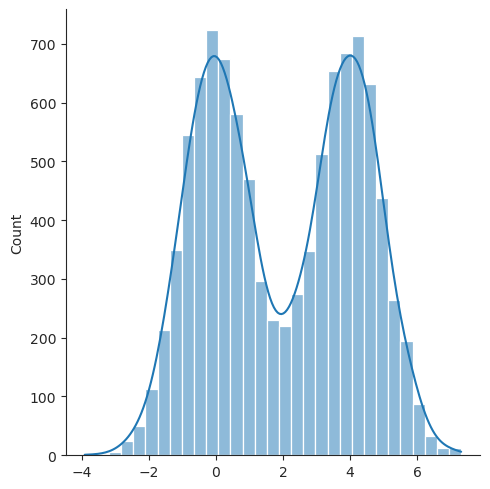

In [63]:
# Visualize the bimodal distribution
# You should see TWO distinct peaks (humps) - one around 0, one around 4
# This is very different from a bell curve

_ = sns.displot(m, kde=True)

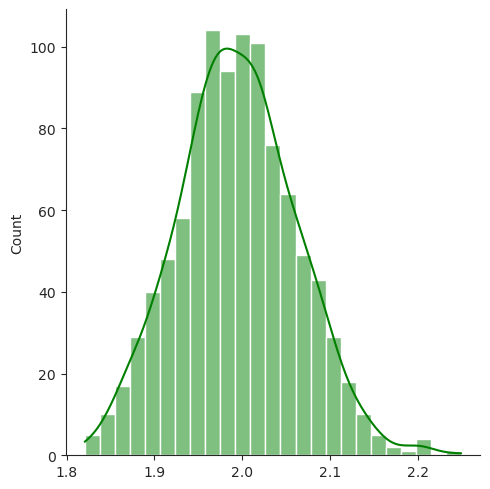

In [64]:
# Take 1000 samples of size 1000 from the bimodal distribution
# Even though the original has TWO peaks, the sample means have ONE peak!
# CLT transforms this strange two-humped distribution into a normal distribution
# This is why CLT is so powerful - it works regardless of the original shape

_ = sns.displot(sample_mean_calculator(m, 1000, 1000), color='green', kde=True)

#### Sampling from uniform distribution

Even sampling from the highly non-normal uniform distribution, the sampling distribution comes out normal: 

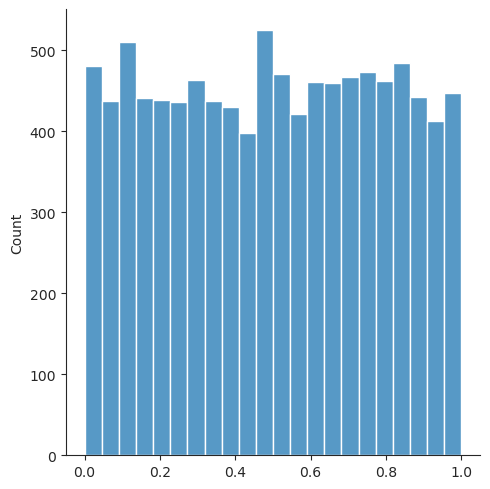

In [65]:
# Visualize the uniform distribution (from earlier)
# Flat, rectangular shape - completely opposite of a bell curve
# Let's see if CLT can transform even this into a normal distribution

_ = sns.displot(u)

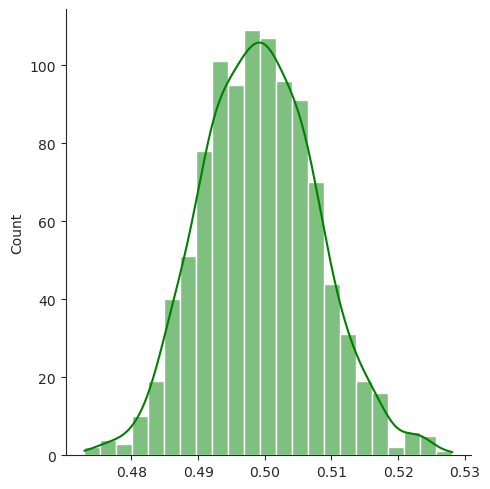

In [66]:
# Take 1000 samples of size 1000 from the UNIFORM distribution
# The sample means form a perfect bell curve!
# This is remarkable: started with a flat rectangle, ended with a bell curve
# CLT says: take enough large samples from ANY distribution, and their means will be normal
# This is why we can use normal-distribution-based tests on almost any data

_ = sns.displot(sample_mean_calculator(u, 1000, 1000), color='green', kde=True)

Therefore, with large enough sample sizes, we can assume the sampling distribution of the means will be normally distributed, allowing us to apply statistical and ML models that are configured for normally distributed noise, which is often the default assumption.

As an example, the "*t*-test" allows us to infer whether two samples come from different populations (say, an experimental group that receives a treatment and a control group that receives a placebo). Thanks to the CLT, we can use this test even if we have no idea what the underlying distributions of the populations being tested are, which may be the case more frequently than not. 

(Despite being associated with such a key concept as the CLT, the name "normal distribution" wasn't originally intended to imply that other distributions are "abnormal". It's a historical quirk related to Gauss describing orthogonal (technically a.k.a. "normal") equations associated with applied uses of the distribution.)

(Finally, you may wonder what the purpose of sampling means is! Well, when we gather data from the real world we are nearly always sampling a subset of all the available data produced by a given random process. And, once we've collected a sample of data, the aspect of it we're often most interested in above all else is its mean.)

## Binomial Distribution
All distributions so far have been for continuous variables (PDFs). This one is discrete (PMF). 

We've already been using it for coin flips; it's used for binary (0 or 1) outcome. 

Its parameters are: 

* *n*: number of trials
* *p*: probability of outcome of 1
* *size*: number of experiments with *n* trials each

In [67]:
# Set parameters for binomial distribution experiments

n = 5                 # Number of coin flips per experiment (trials)
n_experiments = 1000  # How many times to repeat the experiment

### Fair coin (p = 0.5)

In [68]:
# Simulate flipping a fair coin 5 times, repeated 1000 times

heads_count = np.random.binomial(n, 0.5, n_experiments)  # p=0.5 for fair coin

# Count how many times each outcome (0,1,2,3,4,5 heads) occurred
# unique(...) returns: unique values AND their counts
heads, event_count = np.unique(heads_count, return_counts=True)

# Convert counts to probabilities (proportion of experiments)
event_proba = event_count/n_experiments

*Note*
* `np.unique(array)` returns sorted unique values
* `np.unique(array, return_counts=True)` returns TWO arrays:
  1. Unique values (sorted)
  2. Count of how many times each appears

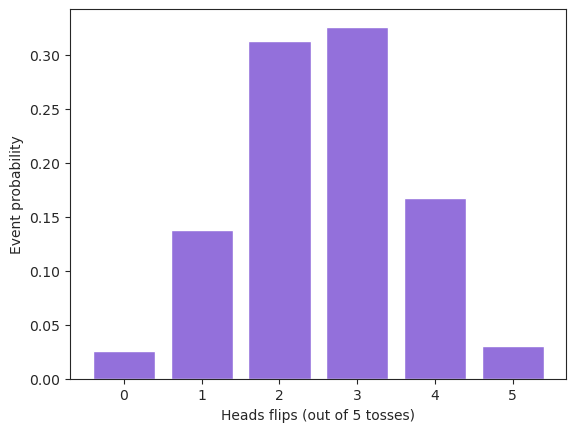

In [69]:
# Visualize the probability distribution as a bar chart

plt.bar(heads, event_proba, color='mediumpurple')
plt.xlabel('Heads flips (out of 5 tosses)')
_ = plt.ylabel('Event probability')

# For a fair coin, the distribution should be symmetric around 2.5 heads
# Most common outcome: 2 or 3 heads (middle values)

### Weighted coin (p = 0.8)

In [70]:
# Simulate flipping a WEIGHTED coin (p=0.8 means 80% chance of heads)
# This models biased processes: maybe a trick coin, or an
# unfair system where success is more likely than failure

heads_count = np.random.binomial(n, 0.8, n_experiments)

heads, event_count = np.unique(heads_count, return_counts=True)
event_proba = event_count/n_experiments

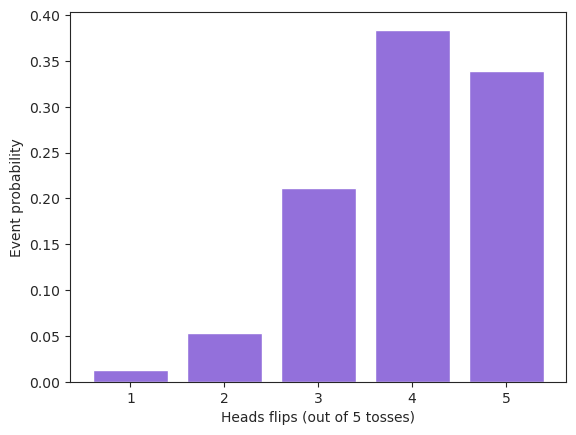

In [71]:
# Visualize the weighted coin distribution

plt.bar(heads, event_proba, color='mediumpurple')
plt.xlabel('Heads flips (out of 5 tosses)')
_ = plt.ylabel('Event probability')

# Distribution is skewed RIGHT - 4 or 5 heads are most likely
# Shows how changing probability (p) shifts the distribution

Technically, binomial distributions are created by sampling $n>1$ "Bernoulli trials". The **Bernoulli** distribution is equivalent to the binomial distribution where $n=1$: 

In [72]:
# Bernoulli distribution: special case of binomial where n=1
# Single trial with binary outcome (0 or 1)
# Think: single coin flip, single yes/no question, single true/false test

np.random.binomial(1, 0.5)  # Returns either 0 or 1

0

Real-world examples:

* Making it to work on time
* Candidate being invited to interview
* Epidemiology: probability of death or catching disease

# Hands-On Activity

**Activity**: The CLT Challenge

**Mode**: Collaborative/Pair Programming

**Duration**: 15m mins

**🎯Goal**: Demonstrate that the mean of any distribution becomes Normal. 

**⚡ Task**: 

1. Generate a highly skewed distribution (e.g., exponential) and plot it to confirm it looks nothing like a Bell curve.
2. Write a function that takes 50 random samples from that skewed distribution and calculates the mean.
3. Repeat this 1,000 times to create a list of 1,000 sample means.
4. Plot the histogram of those means using seaborn.

**❓ Discussion Question**: 
* Does the result look like a Bell curve? 
* What happens to the width of the bell if we take 100 samples instead of 50?

In [73]:
# Write your code here ...

# Extra Reference (Self-Study)
The following topics extend your understanding of this chapter. Explore them independantly to strengthen your skills and confidence.

## Exponential Distribution
Relatively squished up against zero and then decreases exponentially toward higher values.

In [74]:
# Generate exponential distribution with scale parameter = 4
# scale controls the "spread" - higher scale = more spread out
# Exponential: many small values, few large values
# Models "time until event" (e.g., time until next customer arrives)

x = np.random.exponential(scale=4, size=10000)


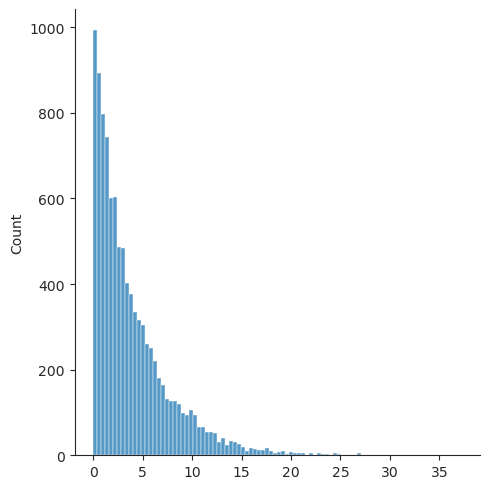

In [75]:
# Visualize the exponential distribution
# Should see: high bar on the left (many small values)
# Bars decrease rapidly moving right (few large values)
# Classic "hockey stick" shape

_ = sns.displot(x)

Its logarithm has a skewed distribution: 

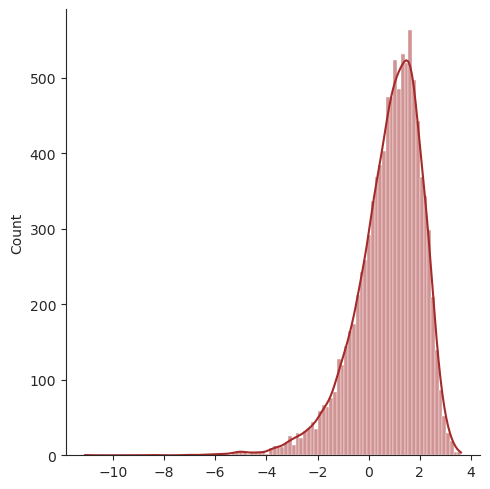

In [76]:
# Take the logarithm of the exponential distribution
# np.log() transforms exponential into something more symmetric
# This log-transformation is commonly used to "normalize" skewed data
# Makes it easier to work with in statistical models

_ = sns.displot(np.log(x), color='brown', kde=True)

Real-world examples: 

* Time between requests to access Wikipedia pages
* Used frequently in deep learning

## Multinomial Distribution
Generalization of the binomial distribution to discrete random variables with more than two possible outcomes, e.g., the roll of a die: 

In [77]:
# Simulate rolling a die 1000 times

n = 1000

# [1/6.]*6 creates [1/6, 1/6, 1/6, 1/6, 1/6, 1/6] - equal probability for each face
# Returns array with 6 elements: count of how many times each face (1-6) appeared

rolls = np.random.multinomial(n, [1/6.]*6)
rolls  # e.g., [163, 172, 159, 168, 171, 167] - roughly equal counts

array([167, 158, 157, 189, 167, 162])

In [78]:
# Convert counts to probabilities
# Each value should be close to 1/6 ≈ 0.167 for a fair die
# With 1000 rolls, we expect about 167 of each face

event_proba = rolls/n

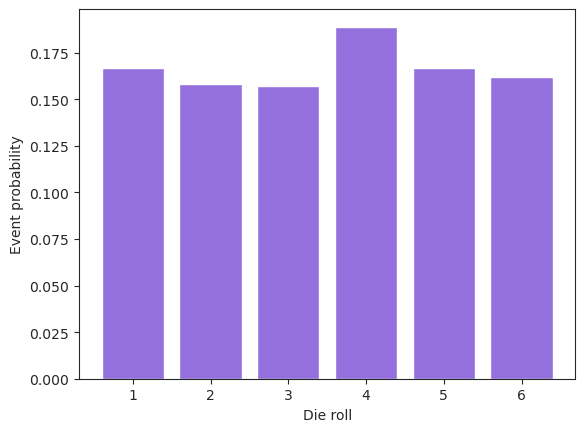

In [79]:
# Visualize the die roll probabilities

plt.bar(range(1, 7), event_proba, color='mediumpurple')  # range(1,7) gives [1,2,3,4,5,6]
plt.xlabel('Die roll')
_ = plt.ylabel('Event probability')

# All bars should be roughly the same height (around 0.167) for a fair die

As in the binomial case, multinomial distributions are created by sampling $n>1$ multinoulli distributions, where the multinoulli distribution is equivalent to the multinomial distribution when $n=1$: 

In [80]:
# Multinoulli distribution: multinomial with n=1 (single trial)
# Roll the die once: returns array like [0,0,0,1,0,0]
# The "1" indicates which face came up (in this example: the 4th face, or "4")
# Generalizes Bernoulli (binary) to multiple categories

np.random.multinomial(1, [1/6.]*6)

array([0, 0, 1, 0, 0, 0])

Since multinomial distributions can represent any categorical variable (e.g., burger, hot dog, pizza; 52 playing cards; NFL teams), not just integer values, we can't always calculate an expected value.